In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, r2_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb

In [13]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [14]:
print('Training Features shape: ', train_data.shape)
print('Testing Features shape: ', test_data.shape)

Training Features shape:  (1460, 81)
Testing Features shape:  (1459, 80)


In [5]:
pd.set_option('display.max_columns', None) # иначе pandas не покажет все столбцы
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

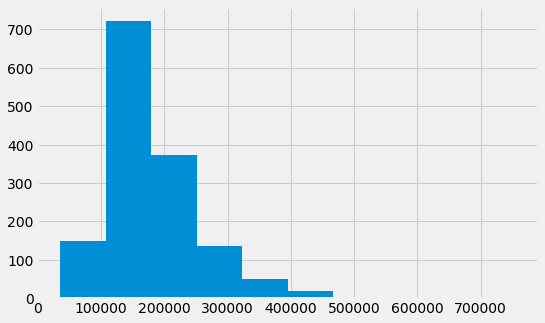

In [8]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [8,5]

plt.hist(train_data.SalePrice)
plt.show()


In [16]:
train_data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [17]:
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [18]:
print('Training Features shape: ', train_data.shape)
print('Testing Features shape: ', test_data.shape)

Training Features shape:  (1460, 290)
Testing Features shape:  (1459, 271)


In [19]:
#сохраним лейблы, их же нет в тестовой выборке и при выравнивании они потеряются. 
train_labels = train_data['SalePrice']

# Выравнивание - сохранятся только столбцы. имеющиеся в обоих датафреймах
train_data, test_data = train_data.align(test_data, join = 'inner', axis = 1)

print('Формат тренировочной выборки: ', train_data.shape)
print('Формат тестовой выборки: ', test_data.shape)

# Add target back in to the data
train_data['SalePrice'] = train_labels

Формат тренировочной выборки:  (1460, 271)
Формат тестовой выборки:  (1459, 271)


In [20]:
correlations = train_data.corr()['SalePrice'].sort_values()

In [24]:
# Отображение
print('Наивысшая позитивная корреляция: \n', correlations.tail(30))
print('\nНаивысшая негативная корреляция: \n', correlations.head(15))

Наивысшая позитивная корреляция: 
 MasVnrType_Stone         0.330476
GarageType_Attchd        0.335961
FireplaceQu_Gd           0.339329
LotFrontage              0.351799
SaleCondition_Partial    0.352060
SaleType_New             0.357509
BsmtFinSF1               0.386420
Neighborhood_NridgHt     0.402149
GarageFinish_Fin         0.419678
HeatingQC_Ex             0.434543
BsmtFinType1_GLQ         0.434597
ExterQual_Ex             0.451164
ExterQual_Gd             0.452466
Fireplaces               0.466929
MasVnrArea               0.477493
GarageYrBlt              0.486362
Foundation_PConc         0.497734
KitchenQual_Ex           0.504094
YearRemodAdd             0.507101
YearBuilt                0.522897
TotRmsAbvGrd             0.533723
BsmtQual_Ex              0.553105
FullBath                 0.560664
1stFlrSF                 0.605852
TotalBsmtSF              0.613581
GarageArea               0.623431
GarageCars               0.640409
GrLivArea                0.708624
OverallQual  

###### 00-.19 “очень слабая”
#####  20-.39 “слабая”
#### 40-.59 “средняя”
### 60-.79 “сильная”
## 80-1.0 “очень сильная”

In [94]:
features_names = []
for index, val in correlations.tail(30).iteritems():
    features_names.append(index)
for index, val in correlations.head(10).iteritems():
    features_names.append(index)
#l.remove('SalePrice')
train_prepared = train_data[features_names]

In [112]:
train_prepared = train_prepared.fillna(train_prepared.median())

In [92]:
features_names1 = []
for index, val in correlations.tail(30).iteritems():
    features_names1.append(index)
for index, val in correlations.head(10).iteritems():
    features_names1.append(index)
features_names1.remove('SalePrice')
test_prepared = test_data[features_names1]

In [113]:
train_prepared.isnull().sum()

MasVnrType_Stone         0
GarageType_Attchd        0
FireplaceQu_Gd           0
LotFrontage              0
SaleCondition_Partial    0
SaleType_New             0
BsmtFinSF1               0
Neighborhood_NridgHt     0
GarageFinish_Fin         0
HeatingQC_Ex             0
BsmtFinType1_GLQ         0
ExterQual_Ex             0
ExterQual_Gd             0
Fireplaces               0
MasVnrArea               0
GarageYrBlt              0
Foundation_PConc         0
KitchenQual_Ex           0
YearRemodAdd             0
YearBuilt                0
TotRmsAbvGrd             0
BsmtQual_Ex              0
FullBath                 0
1stFlrSF                 0
TotalBsmtSF              0
GarageArea               0
GarageCars               0
GrLivArea                0
OverallQual              0
SalePrice                0
ExterQual_TA             0
KitchenQual_TA           0
BsmtQual_TA              0
GarageFinish_Unf         0
MasVnrType_None          0
GarageType_Detchd        0
Foundation_CBlock        0
H

In [114]:
test_prepared = test_prepared.fillna(test_prepared.median())

In [115]:
X = train_prepared.drop('SalePrice',axis=1)
y = train_prepared.SalePrice

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 1127 to 684
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MasVnrType_Stone       978 non-null    uint8  
 1   GarageType_Attchd      978 non-null    uint8  
 2   FireplaceQu_Gd         978 non-null    uint8  
 3   LotFrontage            978 non-null    float64
 4   SaleCondition_Partial  978 non-null    uint8  
 5   SaleType_New           978 non-null    uint8  
 6   BsmtFinSF1             978 non-null    int64  
 7   Neighborhood_NridgHt   978 non-null    uint8  
 8   GarageFinish_Fin       978 non-null    uint8  
 9   HeatingQC_Ex           978 non-null    uint8  
 10  BsmtFinType1_GLQ       978 non-null    uint8  
 11  ExterQual_Ex           978 non-null    uint8  
 12  ExterQual_Gd           978 non-null    uint8  
 13  Fireplaces             978 non-null    int64  
 14  MasVnrArea             978 non-null    float64
 15  Gar

In [118]:
rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=16, random_state=42, max_features=7)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [120]:
rf_regressor.score(X_test,y_test)

0.8618457447105246

In [119]:
rf_regressor.score(X_train,y_train)

0.9792345247565499

In [130]:
lgbm_regressor= LGBMRegressor(max_depth=16,
                             min_samples_leaf=10,
                             n_estimators=300,
                             random_state=42)

In [131]:
lgbm_regressor.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=16,
              min_child_samples=20, min_child_weight=0.001, min_samples_leaf=10,
              min_split_gain=0.0, n_estimators=300, n_jobs=-1, num_leaves=31,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [132]:
lgbm_regressor.score(X_train,y_train)

0.9910202051216164

In [133]:
lgbm_regressor.score(X_test,y_test)

0.8512020354011223

In [152]:
pred_benchmarks = rf_regressor.predict(test_prepared)

In [154]:
test_data['SalePrice'] = pred_benchmarks

In [156]:
fin_benchmark = test_data[['Id','SalePrice']]

In [159]:
fin_benchmark.to_csv('fin_benchmark.csv',index=False)